<a href="https://colab.research.google.com/github/miryalavarshitha/AICTE__INTERNSHIP/blob/main/garbage_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import zipfile
import os

zip_path = "/garbage_dataset.zip"
extract_path = "/garbage_dataset"

# Create the folder if it doesn't exist
os.makedirs(extract_path, exist_ok=True)

# Unzip the file into the folder
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print(f"Unzipped successfully to: {extract_path}")


Unzipped successfully to: /garbage_dataset


In [15]:
import os
import zipfile
import tensorflow as tf


In [16]:
dataset_dir= r"/garbage_dataset/archive/TrashType_Image_Dataset"
image_size = (124, 124)
batch_size = 32
seed = 42

In [17]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    dataset_dir,
    validation_split=0.2,
    subset="training",
    seed=seed,
    shuffle = True,
    image_size=image_size,
    batch_size=batch_size
)

Found 600 files belonging to 6 classes.
Using 480 files for training.


In [18]:
val_ds = tf.keras.utils.image_dataset_from_directory(
    dataset_dir,
    validation_split=0.2,
    subset="validation",
    seed=seed,
    shuffle = True,
    image_size=image_size,
    batch_size=batch_size
)
val_class= val_ds.class_names

Found 600 files belonging to 6 classes.
Using 120 files for validation.


In [19]:
# Split the original validation dataset into validation and test sets

# Get total number of batches in the original validation dataset
total_val_batches = tf.data.experimental.cardinality(val_ds)

# Split: First half for testing, second half for actual validation
test_ds = val_ds.take(total_val_batches // 2)
val_ds_final = val_ds.skip(total_val_batches // 2)

# Optimize the test dataset pipeline with caching and prefetching
test_ds = test_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)


In [20]:
print(train_ds.class_names)  # Prints the list of class names inferred from the folder structure
print(val_class)             # Prints the class names stored earlier from the validation dataset
print(len(train_ds.class_names))  # Prints the total number of classes


['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']
['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']
6


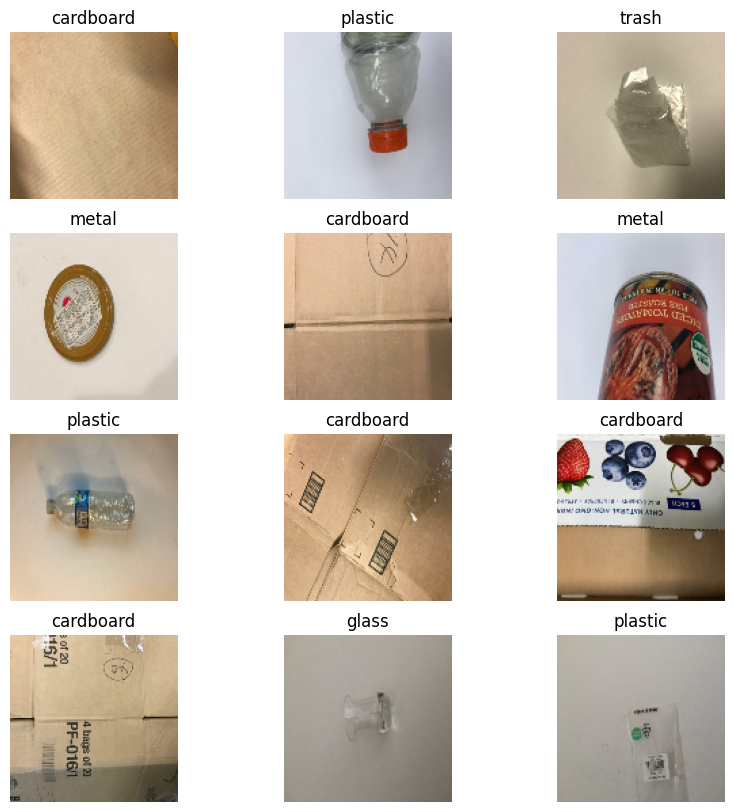

In [21]:
import matplotlib.pyplot as plt

# Set the size of the figure
plt.figure(figsize=(10, 10))

# Take one batch from the training dataset
for images, labels in train_ds.take(1):
    for i in range(12):  # Display first 12 images from the batch
        ax = plt.subplot(4, 3, i + 1)  # Create a 4x3 grid of subplots
        plt.imshow(images[i].numpy().astype("uint8"))  # Display image
        plt.title(train_ds.class_names[labels[i]])     # Show class name
        plt.axis("off")                                # Hide axes
